### **R.CHANDU BADRINATH MANIKANTA**
### **AP24122060018**
### **Mtech Data Science**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'Cancer_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [3]:
print(data.shape)

(569, 33)


In [4]:
# EDA: Summary statistics
summary_statistics = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Checking the distribution of the target variable 'diagnosis'
target_distribution = data['diagnosis'].value_counts()

In [5]:
# Display the results
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064  

In [6]:
print("\nMissing Values:\n", missing_values)


Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wor

In [7]:
print("\nTarget Distribution:\n", target_distribution)


Target Distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64


In [8]:
# Preprocessing: Dropping the irrelevant 'Unnamed: 32' column
data_cleaned = data.drop(columns=['Unnamed: 32'])

# Encoding the 'diagnosis' column (M -> 1, B -> 0)
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# Separating features and target variable
X = data_cleaned.drop(columns=['id', 'diagnosis'])  # Drop 'id' as well, it's not needed for analysis
y = data_cleaned['diagnosis']

# Normalizing the feature variables for consistency
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
# Display the cleaned and preprocessed data (first few rows)
print("\nPreprocessed Feature Data (first 5 rows):\n", X_scaled.head())
print("\nPreprocessed Target Variable (first 5 rows):\n", y.head())


Preprocessed Feature Data (first 5 rows):
    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  te

<ipython-input-17-aa7590f4ec3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['diagnosis'], palette=['#FF69B4', '#32CD32'])  # Hot pink and lime green
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


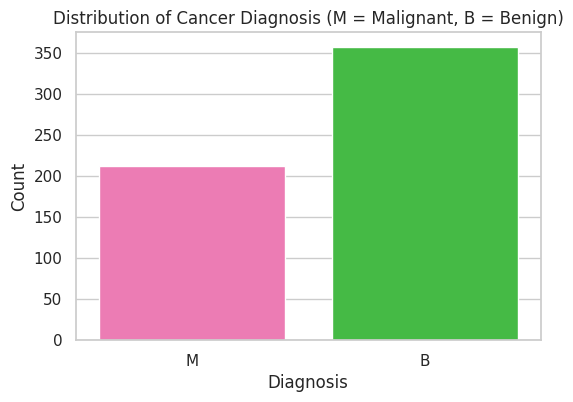

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a general style for the plots
plt.figure(figsize=(6, 4))
sns.countplot(x=data['diagnosis'], palette=['#FF69B4', '#32CD32'])  # Hot pink and lime green
plt.title('Distribution of Cancer Diagnosis (M = Malignant, B = Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()



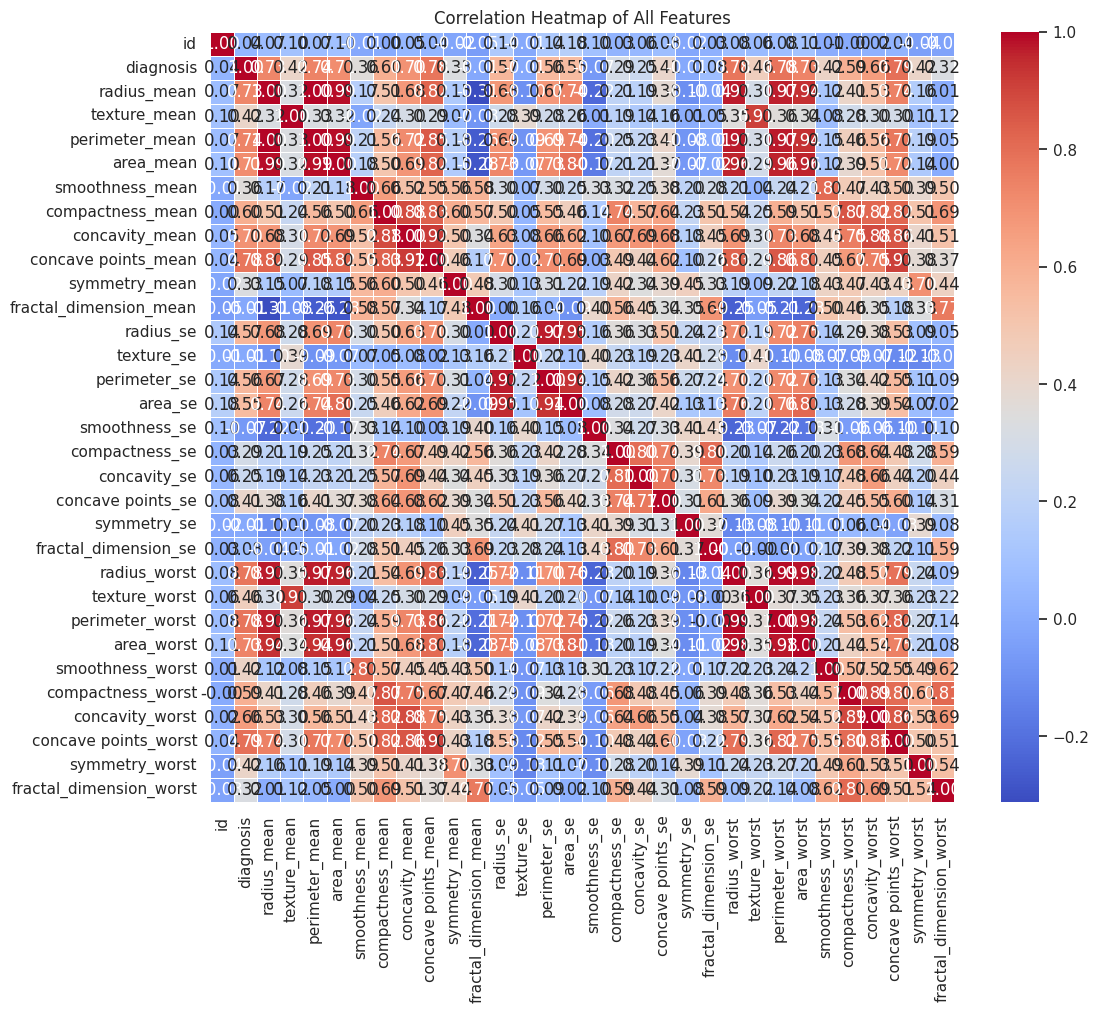

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

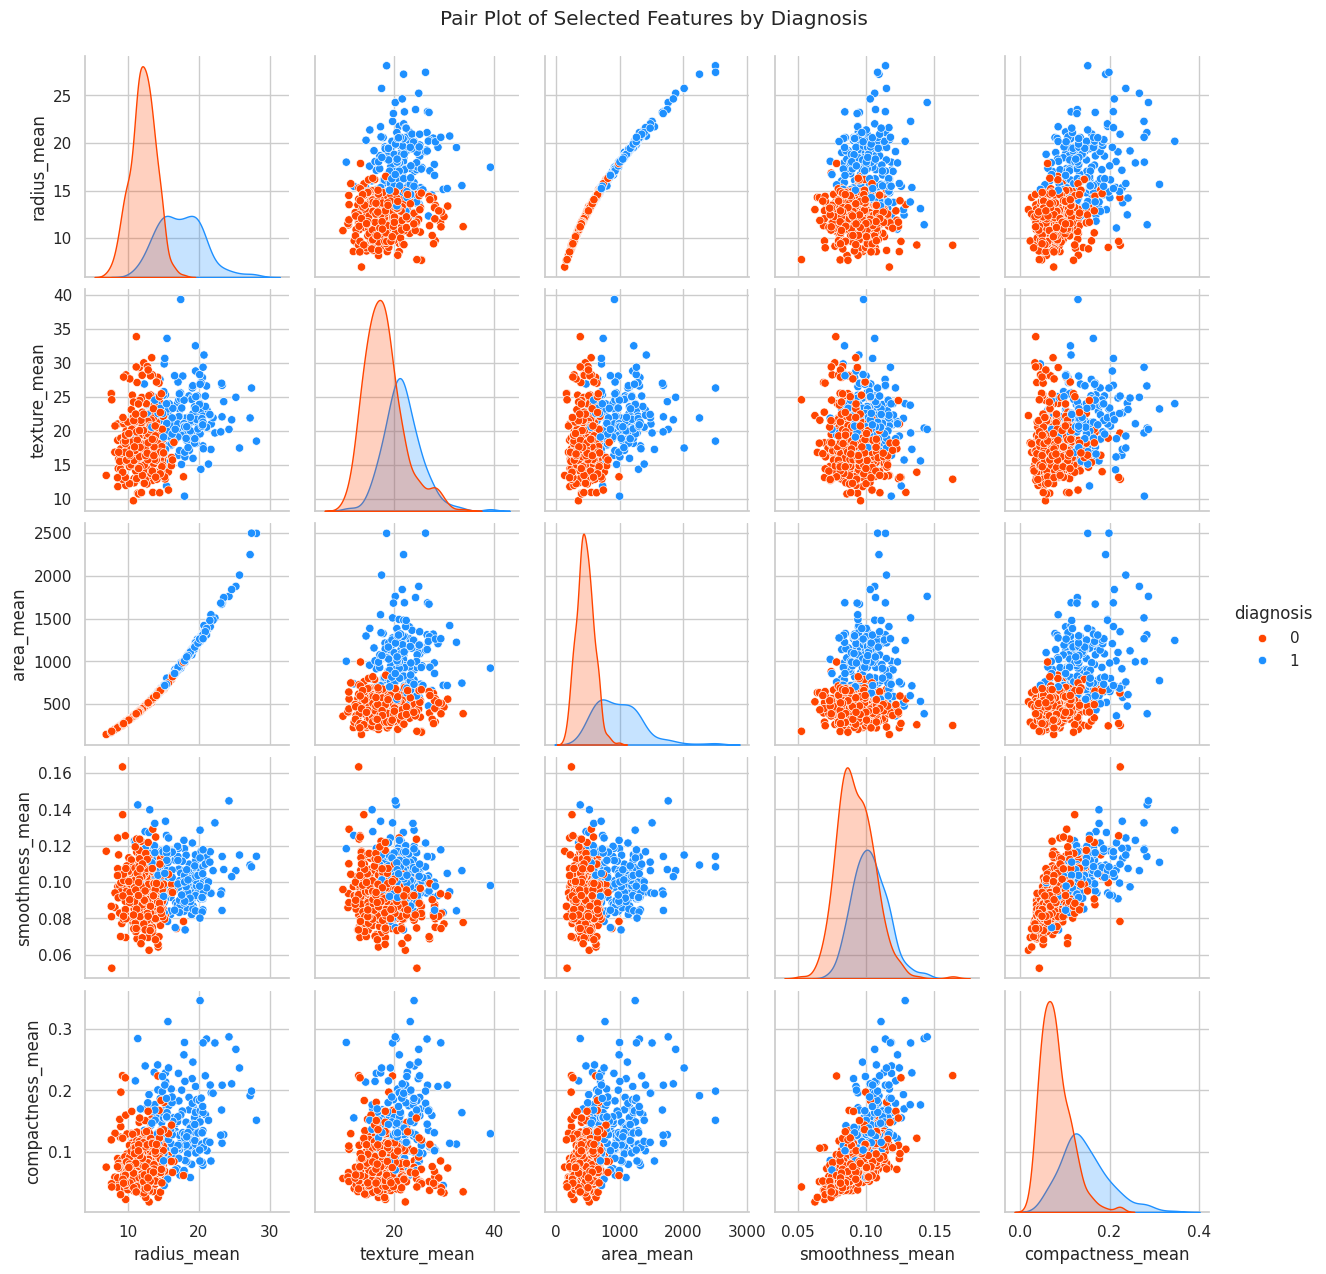

In [15]:
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
sns.pairplot(data_cleaned[features_to_plot + ['diagnosis']], hue='diagnosis', palette=['#FF4500', '#1E90FF'], diag_kind='kde')  # Bright colors: orange red and dodger blue
plt.suptitle('Pair Plot of Selected Features by Diagnosis', y=1.02)
plt.show()

<ipython-input-13-18d8b1e87598>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=data_cleaned, palette=['#FFA07A', '#20B2AA'])  # Example colors: light salmon and light sea green
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping w

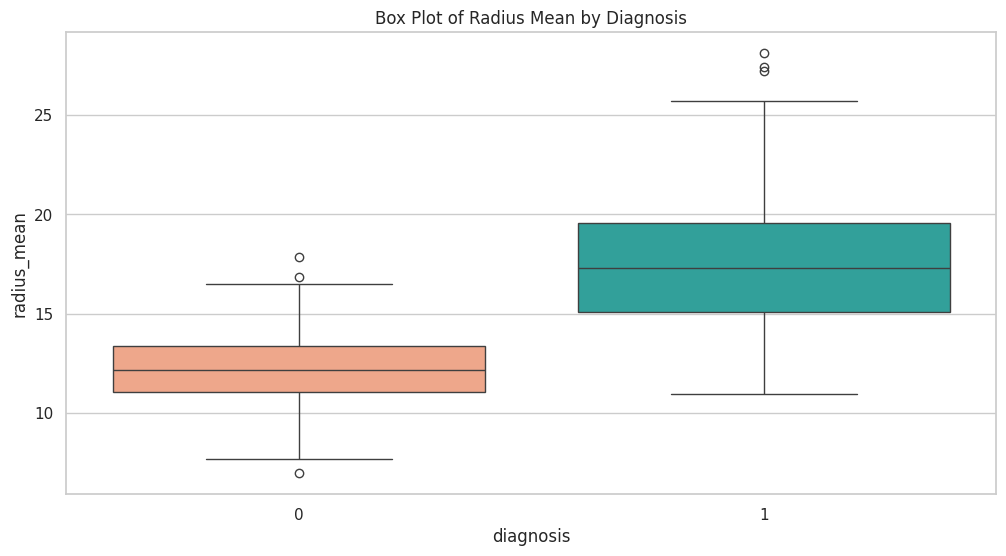

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data_cleaned, palette=['#FFA07A', '#20B2AA'])  # Example colors: light salmon and light sea green
plt.title('Box Plot of Radius Mean by Diagnosis')
plt.show()

<ipython-input-14-827e09e4e698>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='area_mean', data=data_cleaned, palette=['#FF6347', '#4682B4'])  # Example colors: tomato and steelblue


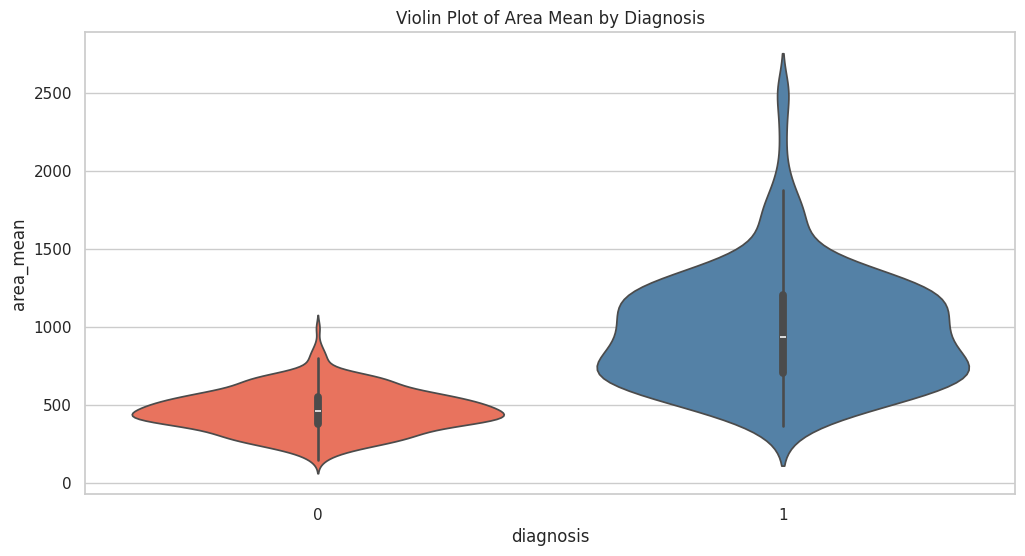

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='diagnosis', y='area_mean', data=data_cleaned, palette=['#FF6347', '#4682B4'])  # Example colors: tomato and steelblue
plt.title('Violin Plot of Area Mean by Diagnosis')
plt.show()